# Product backorders analysis

In Data analysis part a list of questions about the data set were answered. 
Questions to answer using the data:  

1. How many total orders?

2. How many of product went on backorder?

3. What is relationship between lead time and backorders?

4. What lead time has the highest backorders?

5. What lead time has the highest and lowest order volume?

6. What is the relationship between part risk flags?and how prevalent are they? 

7. Whats the relationship between sales and forecast? 

8. What's the relationship between potential issue and pieces past due are each represented by part risk flags or are thet unrelated concepts? 

9. What is the highest and lowest product sales that went on backorder?

10. What is the relationship between prior sales?


Dataset was acquired from https://www.kaggle.com/tiredgeek/predict-bo-trial.Dataset composed of one one file named Training_Dataset.

In [1]:
import decimal

import pandas as pd
import numpy as np

from scipy import stats

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
backorder_file = pd.read_csv("Kaggle_Training_Dataset_v2.csv")


/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
orders = (backorder_file
              .drop(backorder_file.index[len(backorder_file)-1])# drop invalid last row
              .replace(['Yes', 'No'], [1, 0]))  

In [4]:
#replacing -99 missing values to mean
for col in ['perf_6_month_avg', 'perf_12_month_avg']:
    orders[col] = Imputer(missing_values=-99).fit_transform(
                                    orders[col].values.reshape(-1, 1))

In [5]:
orders.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.782381,0.776976,0.0,0,0,0,1,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.990000,0.990000,0.0,0,0,0,1,0,0
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.782381,0.776976,0.0,1,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.100000,0.130000,0.0,0,0,0,1,0,0
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.782381,0.776976,0.0,1,0,0,1,0,0


In [6]:
#How many total orders?
orders.sku.size

1687860

In [7]:
#How many of product went on backorder?
prob=len(orders[orders.went_on_backorder==1])/len(orders.sku)
print((prob*100),'%')
print(len(orders[orders.went_on_backorder==1]))

0.6690720794378681 %
11293


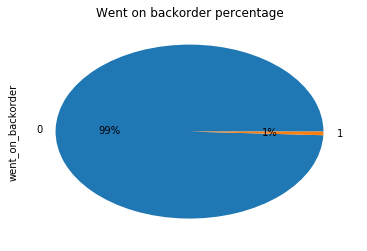

In [8]:
orders.went_on_backorder.value_counts().sort_index().plot(kind='pie', autopct='%1.0f%%')
plt.title('Went on backorder percentage')
plt.show()

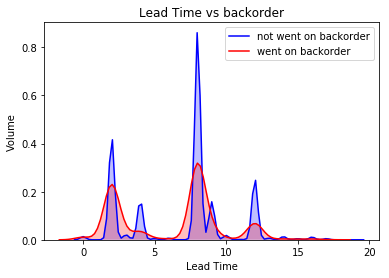

In [9]:
#What is relationship between lead time and backorders?
#Relationship between lead time and went on backorder
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='b', shade=True,label='not went on backorder',)
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='r',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.ylabel('Volume')
plt.xlabel('Lead Time')
plt.show()

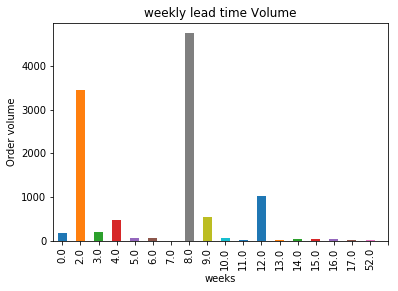

In [10]:
#What lead time has the highest backorders?
backorder_df=orders[orders['went_on_backorder']==1]
weekdist=backorder_df['lead_time'].value_counts().sort_index()
weekdist.plot(kind='bar')
_=plt.xlabel('weeks')
_=plt.ylabel('Order volume')
_=plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.title('weekly lead time Volume')
plt.show()

In [11]:
## These are the peak weeks
weekdist[weekdist>1000].sort_values(ascending=False)

8.0     4744
2.0     3457
12.0    1024
Name: lead_time, dtype: int64

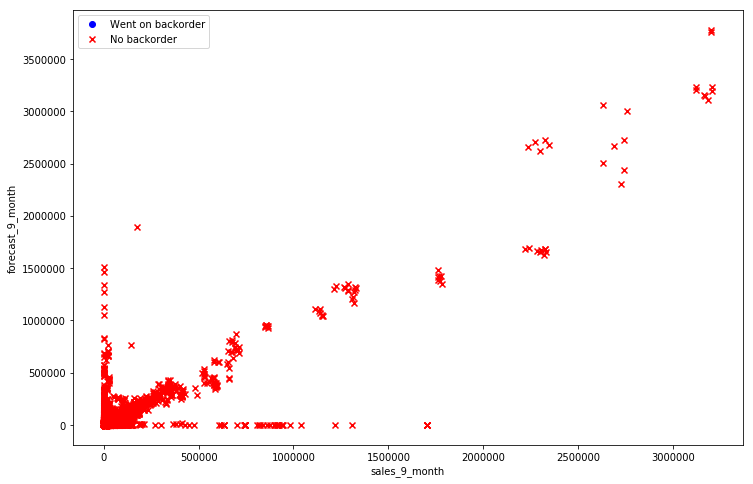

In [12]:
#Whats the relationship between sales and forecast? 

positive = orders[orders['went_on_backorder'].isin([1])]  
negative = orders[orders['went_on_backorder'].isin([0])]
sales_p=positive['sales_9_month']
sales_n=negative['sales_9_month']
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(sales_p, (positive['forecast_9_month']), c='b', marker='o', label='Went on backorder')  
ax.scatter(sales_n,(negative['forecast_9_month']), c='r', marker='x', label='No backorder')  
ax.legend()  
ax.set_xlabel('sales_9_month')  
ax.set_ylabel('forecast_9_month') 
plt.show()

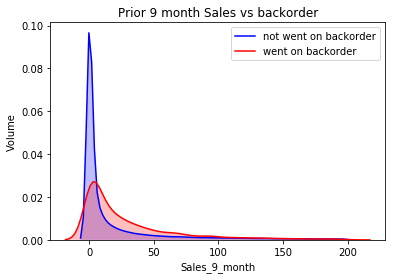

In [13]:
#relationship between sales and went on backorder
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['sales_9_month'] < 200)]['sales_9_month'],color='b', shade=True,label='not went on backorder',)
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['sales_9_month'] < 200)]['sales_9_month'], color='r',shade=True,label='went on backorder')
plt.title('Prior 9 month Sales vs backorder')
plt.ylabel('Volume')
plt.xlabel('Sales_9_month')
plt.show()

In [14]:
#What is the relationship between prior sales?

orders.plot(x="lead_time", y=["sales_3_month", "sales_6_month", "sales_9_month"], kind="bar")
plt.show()

/home/ubuntu/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


KeyboardInterrupt: 

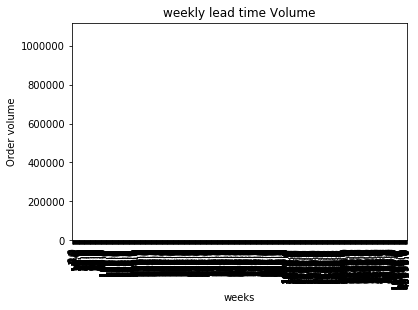

In [15]:
#What is the highest and lowest product sales that went on backorder?
backorder_df=orders[orders['went_on_backorder']==1]
weekdist=backorder_df['sales_9_month'].value_counts().sort_index()
weekdist.plot(kind='bar')
_=plt.xlabel('weeks')
_=plt.ylabel('Order volume')
plt.title('weekly lead time Volume')
plt.show()


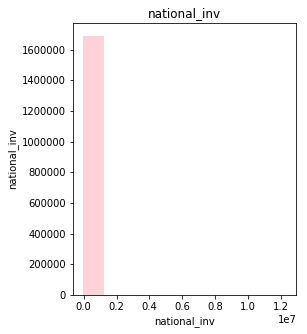

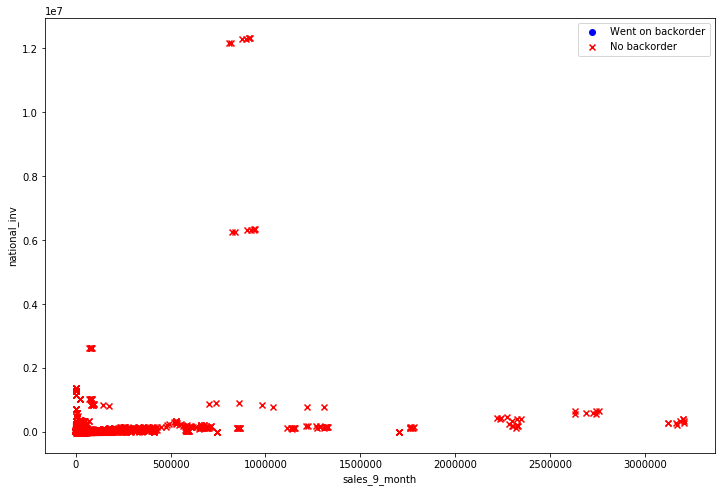

In [20]:
#What is relationship of national inv and lead time
orders['national_inv'].hist(figsize=(4,5), alpha=0.7, color='pink', grid=False)
plt.xlabel('national_inv')
plt.ylabel('national_inv')
plt.title('national_inv')
plt.show()

positive = orders[orders['went_on_backorder'].isin([1])]  
negative = orders[orders['went_on_backorder'].isin([0])]
sales_p=positive['sales_9_month']
sales_n=negative['sales_9_month']
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(sales_p, (positive['national_inv']), c='b', marker='o', label='Went on backorder')  
ax.scatter(sales_n,(negative['national_inv']), c='r', marker='x', label='No backorder')  
ax.legend()  
ax.set_xlabel('sales_9_month')  
ax.set_ylabel('national_inv') 
plt.show()

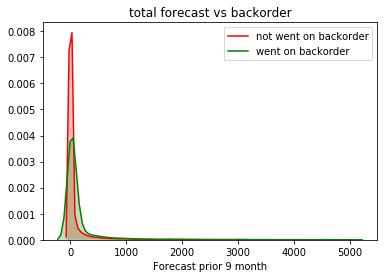

In [16]:
#What is the relationship of min_bank and lead time

sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['forecast_9_month']<5000)]['forecast_9_month'],color='r', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['forecast_9_month']<5000)]['forecast_9_month'], color='g',shade=True,label='went on backorder')
plt.title('total forecast vs backorder')
plt.xlabel('Forecast prior 9 month')
plt.show()

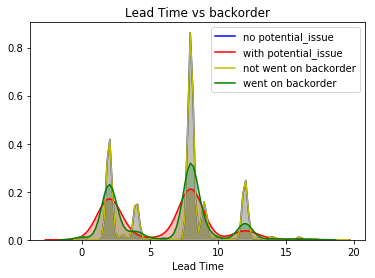

In [17]:
sns.kdeplot(orders[(orders['potential_issue'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='b', shade=True,label='no potential_issue')
sns.kdeplot(orders[(orders['potential_issue'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='r',shade=True,label='with potential_issue')
plt.title('Lead Time vs backorder and potential issue from the source')
plt.xlabel('Lead Time')

sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='y', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='g',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.xlabel('Lead Time')
plt.show()

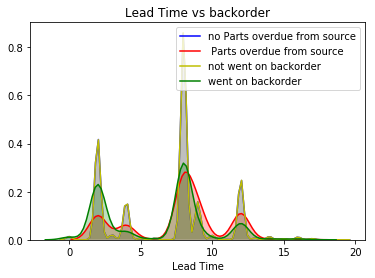

In [18]:

sns.kdeplot(orders[(orders['pieces_past_due'] == 0) & (orders['lead_time']<20)]['lead_time'],color='b', shade=True,label='no Parts overdue from source')
sns.kdeplot(orders[(orders['pieces_past_due'] == 1) & (orders['lead_time']<20)]['lead_time'], color='r',shade=True,label=' Parts overdue from source')
plt.title('lead_time vs  Parts overdue from source')
plt.xlabel('Lead Time')
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='y', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='g',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.xlabel('Lead Time')
plt.show()

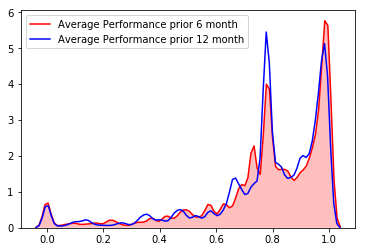

In [19]:
#prior Perfor_6 month and perf_12 month
sns.kdeplot((orders['perf_6_month_avg']),color='r', shade=True,label='Average Performance prior 6 month')
sns.kdeplot((orders['perf_12_month_avg']),color='b', shade=False,label='Average Performance prior 12 month')
plt.show()